In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def adjust_lists(lista):
    values = lista.replace(" ", ",").replace("[", "").replace("]", "").replace("\n", "").split(",")
    return [float(x) for x in values if len(x)>1]

In [2]:
df = pd.read_csv("../data/results/quantification.csv", converters={"score": adjust_lists}).explode(column="score").reset_index(drop=True)
df.dimension = df.dimension.apply(lambda x: "partisan" if x=="demo_rep" else x)
df.head(2)

,model,score,metric,use_declaration_in_train,dimension,seed,Class counts test,Class counts train,Class counts declarations,n samples,n samples train,n samples test,perc samples train,perc samples test,hyper-param grid search
0,Random Forest,0.488726,ae,False,year,0,[64645 50084],[3799 3799],[214880 167549],382429,7598,114729,0.019868,0.300001,False
1,Random Forest,0.581058,ae,False,year,0,[64645 50084],[3799 3799],[214880 167549],382429,7598,114729,0.019868,0.300001,False


/tmp/ipykernel_2963788/709883698.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accuracy_df.model = accuracy_df.model.apply(lambda x: modelnames_map[x])
/tmp/ipykernel_2963788/709883698.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accuracy_df.model = accuracy_df.model.apply(lambda x: modelnames_map[x])
/tmp/ipykernel_2963788/709883698.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

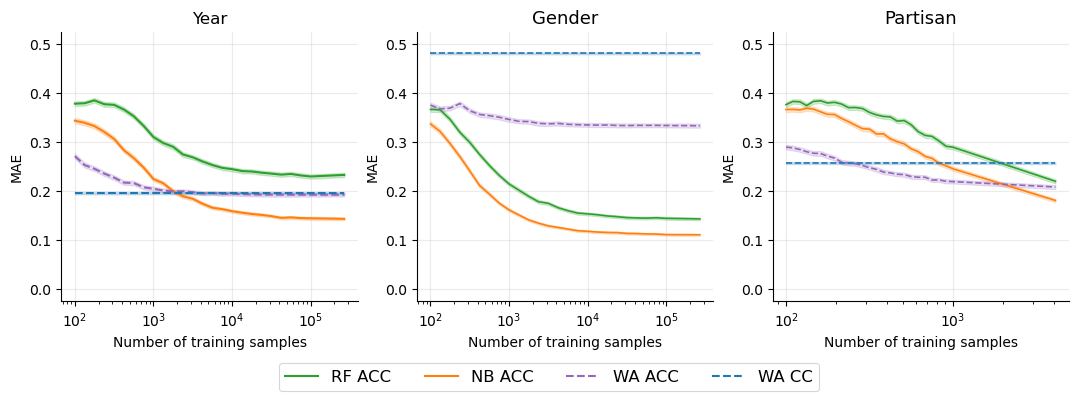

In [3]:
metric = "ae"
savefig = True
fig, axs = plt.subplots(1, 3, figsize=(13, 3.5))
MODELS2FILTER = {'NB_logGMMT', 'SS_NB', 'SS_NB_logGMMT'}


modelnames_map = {
    'Random Forest': 'RF ACC', 
    'Multinomial NB': 'NB ACC', 
    'Majority Model': 'Majority', 
    'Nature Model': 'WA ACC', 
    'Nature Model_CC': 'WA CC', 
    'SS_NB_logGMMT': 'SS NB logGMMT ACC', 
    'NB_logGMMT': 'NB logGMMT ACC',
    'SS_NB': 'SS NB ACC'
}

special_models = {"WA CC", "WA ACC"}  # Models with dashed lines
default_linestyle = "-"  # Default linestyle for all other models
special_linestyle = "--"  # Linestyle for the special models

# Create a dictionary for model-specific line styles
model_linestyles = {
    model: special_linestyle if model in special_models else default_linestyle
    for model in modelnames_map.values()
}

for i, dimension in enumerate(df.dimension.unique()):
    df_curr = df[df.model != 'Majority Model']
    SELECT, SUBTITLE  = ((df_curr['metric'] == metric) & (df_curr['use_declaration_in_train']) & (df_curr['dimension'] == dimension), "(True supervision)") 
    accuracy_df = df_curr[SELECT & (~df_curr.model.isin(MODELS2FILTER))]

    accuracy_df.model = accuracy_df.model.apply(lambda x: modelnames_map[x])

    cmap = plt.get_cmap("tab10")
    palette = {model: cmap(i) for i, model in enumerate(['WA CC', 'NB ACC', 'RF ACC', 'SS NB logGMMT ACC', 'WA ACC', 'SS NB ACC', 'NB logGMMT ACC'])}  # Map models to colors


    
    # Accuracy plot
    for model in accuracy_df['model'].unique():
        subset = accuracy_df[accuracy_df['model'] == model]
        sns.lineplot(
            x='n samples train',
            y='score',
            data=subset,
            ax=axs[i],
            hue=None,  # Disable hue for this plot
            color=palette[model],  # Use predefined color
            linestyle=model_linestyles[model],  # Apply custom linestyle
            label=model,  # Add legend entry
        )
    axs[i].set_title(f'{dimension.capitalize()}')
    axs[i].set_ylabel('MAE')#axs[i].set_ylabel(f'{metric.replace("_", " ").capitalize()}')
    axs[i].set_xscale('log')
    #axs[i].set_xlim((10_000, None))
    ε = .025
    axs[i].set_ylim((0-ε, 0.5+ε))
    axs[i].set_xlabel('Number of training samples')
    axs[i].grid(alpha=.25)
    #axs[i].legend(loc='upper right', prop={'size': 7}, ncol=2)
    if axs[i].get_legend() is not None:
        axs[i].get_legend().remove()
    sns.set_context("paper", font_scale=1.35) 
    sns.despine()
handles, labels = axs[0].get_legend_handles_labels()  # Collect from the first subplot
fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.17))

if savefig:
    plt.savefig(f'../data/figures/quantification_true_supervision.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
max_indices = df.groupby('dimension')['n samples train'].idxmax()

# Filter the DataFrame to keep only the rows with the maximum 'n samples train'
max_rows = df.loc[max_indices]
max_rows

,model,score,metric,use_declaration_in_train,dimension,seed,Class counts test,Class counts train,Class counts declarations,n samples,n samples train,n samples test,perc samples train,perc samples test,hyper-param grid search
1120000,Random Forest,0.06917,ae,True,gender,0,[58770 56271],[136367 132059],[195137 188330],383467,268426,115041,0.699998,0.300002,False
2161600,Random Forest,0.078449,ae,False,partisan,4,[956 804],[3800 3800],[3199 2665],5864,7600,1760,1.296044,0.300136,False
40000,Random Forest,0.145624,ae,True,year,0,[64645 50084],[150235 117465],[214880 167549],382429,267700,114729,0.699999,0.300001,False


In [5]:
metric = "ae"

for supervision in ["true", "distance"]:
    if supervision == "true":
        SELECT1 = (df['metric'] == metric) & (df['use_declaration_in_train']) 
    elif supervision == "distance":
        SELECT1 = (df['metric'] == metric) & (~df['use_declaration_in_train']) 

    SELECT2 = (df[SELECT1]['n samples train'].isin(set(df[SELECT1].groupby("dimension")['n samples train'].max().values))) # we plot only max training for each dimension

    df.model = df.model.apply(lambda x: f'{x.replace("_", " ")}')
    grouped_data = df[SELECT1 & SELECT2].groupby(["model", "dimension"]).score.agg(['mean', 'std'])

    pivot_table = grouped_data.unstack(level='dimension')

    def format_mean_std(row):
        return ["{:.3f} $\\pm$ {:.3f}".format(mean, std) for mean, std in zip(row['mean'], row['std'])]

    formatted_table = pivot_table.apply(format_mean_std, axis=1, result_type='expand')
    formatted_table.columns = [f"{dimension} (mean $\\pm$ std)" for dimension in grouped_data.index.get_level_values('dimension').unique()]

    print(supervision, "\n")
    display(formatted_table)

    # Save latex
    latex_table = formatted_table.to_latex(index=True, escape=False, column_format='l' + 'c' * len(formatted_table.columns))

    with open(f"../data/tables/quantification_{supervision}_supervision.tex", 'w') as file:
        file.write(latex_table)

# TRUE

true 



,gender (mean $\pm$ std),partisan (mean $\pm$ std),year (mean $\pm$ std)
model,,,
Majority Model,0.319 $\pm$ 0.172,0.344 $\pm$ 0.175,0.532 $\pm$ 0.088
Multinomial NB,0.111 $\pm$ 0.084,0.181 $\pm$ 0.132,0.143 $\pm$ 0.106
NB logGMMT,0.111 $\pm$ 0.085,0.181 $\pm$ 0.130,0.144 $\pm$ 0.107
Nature Model,0.333 $\pm$ 0.147,0.208 $\pm$ 0.146,0.192 $\pm$ 0.137
Nature Model CC,0.481 $\pm$ 0.070,0.257 $\pm$ 0.082,0.195 $\pm$ 0.079
Random Forest,0.143 $\pm$ 0.106,0.220 $\pm$ 0.153,0.233 $\pm$ 0.155
SS NB,0.110 $\pm$ 0.084,0.194 $\pm$ 0.141,0.143 $\pm$ 0.106
SS NB logGMMT,0.110 $\pm$ 0.084,0.190 $\pm$ 0.138,0.143 $\pm$ 0.106


distance 



,gender (mean $\pm$ std),partisan (mean $\pm$ std),year (mean $\pm$ std)
model,,,
Majority Model,0.377 $\pm$ 0.113,0.449 $\pm$ 0.080,0.539 $\pm$ 0.075
Multinomial NB,0.112 $\pm$ 0.084,0.407 $\pm$ 0.084,0.094 $\pm$ 0.079
NB logGMMT,0.110 $\pm$ 0.083,0.410 $\pm$ 0.084,0.084 $\pm$ 0.068
Nature Model,0.472 $\pm$ 0.114,0.434 $\pm$ 0.116,0.444 $\pm$ 0.063
Nature Model CC,0.480 $\pm$ 0.071,0.256 $\pm$ 0.079,0.206 $\pm$ 0.073
Random Forest,0.495 $\pm$ 0.074,0.156 $\pm$ 0.106,0.536 $\pm$ 0.066
SS NB,0.110 $\pm$ 0.083,0.408 $\pm$ 0.085,0.086 $\pm$ 0.065
SS NB logGMMT,0.113 $\pm$ 0.087,0.408 $\pm$ 0.084,0.086 $\pm$ 0.070
